### OkCupid DataSet
### Meeting 4, 28- 01- 2020


### Recap last meeting's decisions:
<ol>
  <p>Meeting 3, 10- 12- 2019</p>
    <li>Check all the preprocessing steps.</li>
    <li>The dataset is extremely imbalanced.</li>
    <li>Exclude class 1 and class 5 inorder to make the dataset balanced.</li>

</ol>

### To discuss:

<ol>
  <p></p>  
  <li> Decide about class 8</li>
  <li> Readability</li>
  
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


In [2]:
df = pd.read_csv('../../data/processed/preprocessed_cupid.csv', usecols=['age', 'sex','#anwps', 'clean_text', 'isced', 'isced2'])


In [3]:
df = df.dropna(subset=['clean_text', 'isced'])
df.head()

#

,age,sex,isced,isced2,#anwps,clean_text
0,22,m,3.0,Upper secondary education,15.000000,mei love think kind intellectualeither dumbest...
2,38,m,7.0,Master or equivalent,18.000000,im ashamed writing public text onlinedating si...
3,23,m,3.0,Upper secondary education,10.750000,work library school reading things written old...
4,29,m,6.0,Bachelor or equivalent,11.833333,hey hows going currently vague profile know to...
5,29,m,6.0,Bachelor or equivalent,11.840000,im australian living san francisco dont hold t...


# Preprocessing:


## 1- expand contractions

In [141]:
 import contractions
# df['clean_textk'] = df['clean_text'].str.lower()


# def expand_contractions(text):
#     expanded = contractions.fix(text)
#     return expanded

# df['v'] = df.apply(lambda x: expand_contractions(x['clean_textk']), axis=1)


## 2- Lemmatization

In [142]:
# # from tqdm import tqdm, tqdm_notebook---- Lemmatization
# from tqdm._tqdm_notebook import tqdm_notebook

# tqdm_notebook.pandas()
# df = pd.read_csv('D:\projects\okcupid\data\processed/preprocessed_cupid.csv')
# df = df.dropna(subset=['clean_text', 'isced'])

# df["clean_text"] = df["clean_text"].progress_apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

## Removing outliers

Text(0.5, 1.0, 'Boxplot of the avarage number of words per sentence')

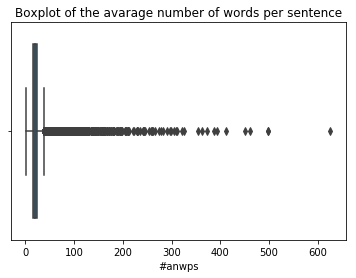

In [143]:
sns.boxplot(df["#anwps"]).set_title("Boxplot of the avarage number of words per sentence")


Text(0.5, 1.0, 'Boxplot of the avarage number of words per sentence')

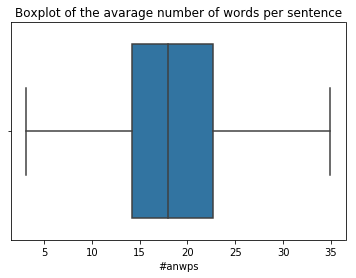

In [144]:
df = df[(df['#anwps']<35) & (df['#anwps']>3)]
sns.boxplot(df["#anwps"]).set_title("Boxplot of the avarage number of words per sentence")


## Imbalanced datasets
### In a dataset with highly imbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate


In [145]:
# df.isced.value_counts().plot(kind='bar', title= 'Count target')
outcome = pd.crosstab(index=df['isced'], columns='count')
outcome

col_0,count
isced,
1.0,149
3.0,8429
5.0,1294
6.0,23977
7.0,9507
8.0,2566


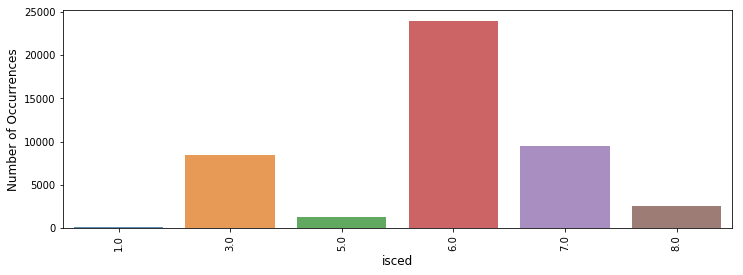

In [147]:

cnt_isced = df['isced'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_isced.index, cnt_isced.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('isced', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [4]:
# # Remove classes 1, 5 and 8 from dataset
df = df[df['isced'].isin([7.0, 6.0, 3.0])]

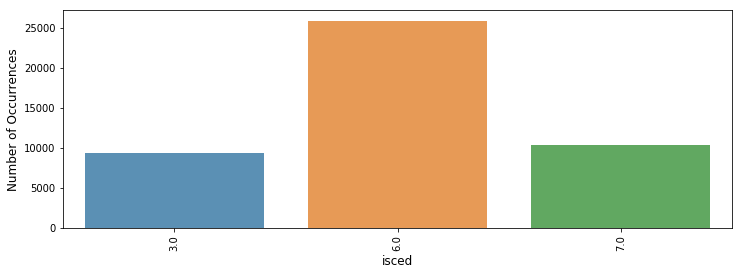

In [5]:
# df.isced.value_counts().plot(kind='bar', title= 'Count target')
cnt_isced = df['isced'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_isced.index, cnt_isced.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('isced', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [6]:
def plot_conf(conf_matrix):
    print('Confusion matrix:\n', conf_matrix)
    labels = ['3', '6', '7', '8']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [7]:
df = df.dropna(subset=['clean_text', 'isced'])
# df = df.dropna(subset=['stemmed', 'isced'])

corpus = df['clean_text']
# corpus = df['stemmed']
target = df["isced"]
# frequency encoding scikit-learn
# vectorizer = CountVectorizer(binary=False, ngram_range=(1, 2))
# vectors = vectorizer.fit_transform(corpus)


In [8]:
# X_train, X_val, y_train, y_val = train_test_split(vectors, target, train_size=0.75,
#                                                           test_size=0.25, random_state = 0)

In [9]:
 X_train, X_val, y_train, y_val = train_test_split(corpus, target, train_size=0.75,
                                                          test_size=0.25, random_state = 0)
vectorizer = CountVectorizer(binary=False, ngram_range=(1, 2), lowercase=True)
# vectorizer = TfidfVectorizer(binary=False, ngram_range=(1, 2))

vectors_train = vectorizer.fit_transform(X_train)
vectors_val = vectorizer.transform(X_val)
X_train = vectors_train
X_val = vectors_val

In [10]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


Using TensorFlow backend.


## Re-sampling Dataset
<ol>
    <p>To make our dataset balanced there are two ways to do so:</p>
    <li>Under-sampling: Remove samples from over-represented classes ; use in the case of huge dataset </li>
    <li>Over-sampling: Add more samples from under-represented classes; use in the case of small dataset</li> 

</ol>
<ol>
  <p></p>
    <img src="rep2_image/resampling.JPG">
    
  
  

</ol>

In [11]:
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_train, y_train)
# y_res.value_counts().plot(kind='bar', title= 'Count target')


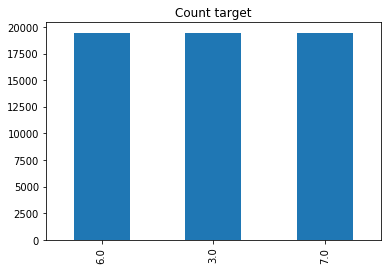

In [12]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)
y_ros.value_counts().plot(kind='bar', title= 'Count target')
# cnt_isced = y_ros.value_counts()
# plt.figure(figsize=(12,4))
# sns.barplot(cnt_isced.index, cnt_isced.values, alpha=0.8)
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('isced', fontsize=12)
# plt.xticks(rotation=90)
# plt.show();

In [13]:
# target_names = y_ros.unique()

## Naive Bayes
### - Extremely fast and simple classification algorithms
### - Suitable for very high-dimensional datasets
### - Few tunable parameters
### -Very useful as a quick-and-dirty baseline for a classification problem

Final Accuracy for NB: 0.6019861147728272
Confusion matrix:
 [[1213 1073  137]
 [ 549 4796 1064]
 [ 116 1590  841]]


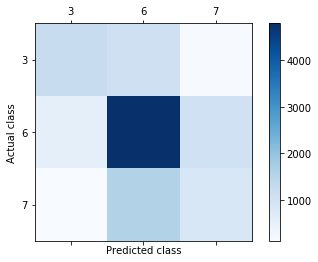

              precision    recall  f1-score   support

         3.0       0.65      0.50      0.56      2423
         6.0       0.64      0.75      0.69      6409
         7.0       0.41      0.33      0.37      2547

    accuracy                           0.60     11379
   macro avg       0.57      0.53      0.54     11379
weighted avg       0.59      0.60      0.59     11379



In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(MultinomialNB())
model.fit(X_ros, y_ros)
# model.fit(X_train, y_train)

gnb_predictions = model.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, gnb_predictions))
cm = confusion_matrix(y_val, gnb_predictions) 
plot_conf(cm)
from sklearn.metrics import classification_report

print(classification_report(y_val, gnb_predictions))

# Evaluation Metrics in Classification
<ol>
    <p></p>
    <img src="rep2_image/confiusion matrix1.jpg">  
  

</ol>




# Logistic Regression

Final Accuracy for LogisticRegression: 0.6192108269619474
Confusion matrix:
 [[1408  928   87]
 [ 665 4826  918]
 [ 185 1550  812]]


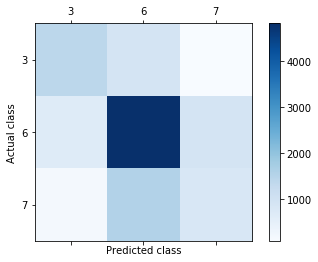

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for LogisticRegression: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)

In [16]:
print(classification_report(y_val, logistic_predictions))

              precision    recall  f1-score   support

         3.0       0.62      0.58      0.60      2423
         6.0       0.66      0.75      0.70      6409
         7.0       0.45      0.32      0.37      2547

    accuracy                           0.62     11379
   macro avg       0.58      0.55      0.56     11379
weighted avg       0.60      0.62      0.61     11379



Final Accuracy for LogisticRegression: 0.619524763813341
Confusion matrix:
 [[1166  835   86]
 [ 618 4572  815]
 [ 133 1500  754]]


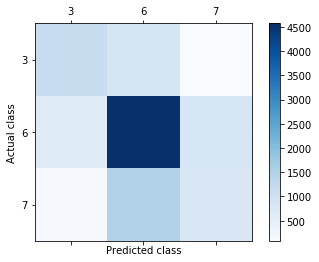

              precision    recall  f1-score   support

         3.0       0.61      0.56      0.58      2087
         6.0       0.66      0.76      0.71      6005
         7.0       0.46      0.32      0.37      2387

    accuracy                           0.62     10479
   macro avg       0.58      0.55      0.55     10479
weighted avg       0.60      0.62      0.61     10479



In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for LogisticRegression: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)
print(classification_report(y_val, logistic_predictions))

## check for different settings:
<ol>
    <p><b> checking for the effect of unigram/bigram/tigram, TF/TF-IDF on accuracy</b> </p>
    <img src="rep2_image/pre_tabel1.jpg"> 
    <p><b> checking for the effect of characters decaptalization on the accuracy</b> </p>
    <img src="rep2_image/pre_tabel2.jpg"> 
    

</ol>



## check for different settings:

<ol>    
    <p><b> checking for the effect of stopwords and punctuations on the accuracy</b> </p>
    <img src="rep2_image/pre_tabel3.jpg">
    <p><b> checking for the effect of lemmatization on the accuracy</b> </p>
    <img src="rep2_image/pre_tabel4.jpg">   

</ol>


## TODO:
### 1- Cross validation
### 2- Gride search

### 3- merge classes 1, 3 and 5     
### 4- undersample 6 to 10000
### 5- merge 7,8


### merge 1,3,5
### merge 6,7,8
### undersample ->10000


### NO. misspelled

### NO. nique words
### Avg no wordlength ->total no characters/no words